In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (9, 6)

## Covariance

$$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$

In [4]:
def covariance(X):
    X = X - X.mean(axis=0)
    X = (X.T @ X) / (len(X)-1)
    return X

In [5]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=7, size=1000)
X = np.vstack((x, y)).T

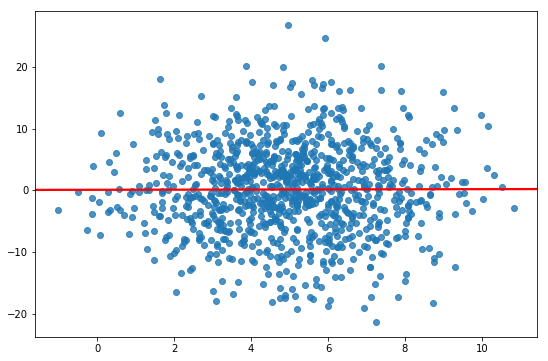

In [6]:
line_kws = {'color':'red'}
sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [7]:
print('Covariance matrix from numpy\n')
print(np.cov(X, rowvar=False))
print('\n=================================\n')
print('Our covariance matrix\n')
print(covariance(X))

Covariance matrix from numpy

[[4.02087420e+00 4.10229064e-02]
 [4.10229064e-02 5.22205774e+01]]


Our covariance matrix

[[4.02087420e+00 4.10229064e-02]
 [4.10229064e-02 5.22205774e+01]]


Normally the covariancd matrix doesn't tell us much but is an intermediate step to calculating the correlation matrix.

<hr>

## Correlation

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [8]:
def correlation(X):
    cov = covariance(X)
    std = X.std(axis=0, ddof=1).reshape(-1, 1) @ X.std(axis=0, ddof=1).reshape(1, -1)
    
    return cov / std

### Generating uncorrelated data

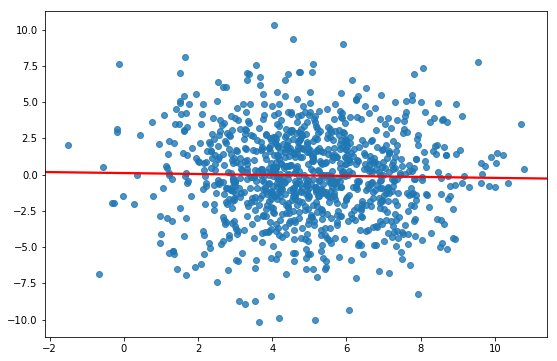

In [9]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)

X = np.vstack((x, y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [10]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[ 1.         -0.02146979]
 [-0.02146979  1.        ]]


Our correlation matrix

[[ 1.         -0.02146979]
 [-0.02146979  1.        ]]


### Generating correlated data

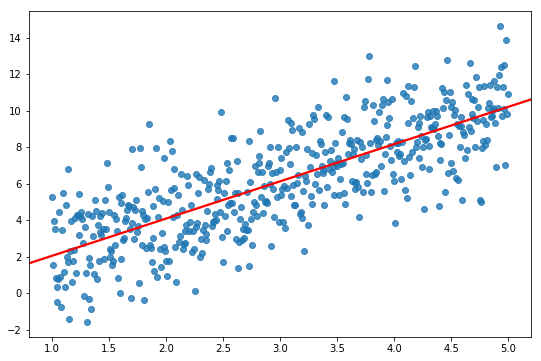

In [11]:
x = np.linspace(1, 5, 500)
y = 2 * x + np.random.normal(scale=2, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [12]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[1.         0.77991445]
 [0.77991445 1.        ]]


Our correlation matrix

[[1.         0.77991445]
 [0.77991445 1.        ]]


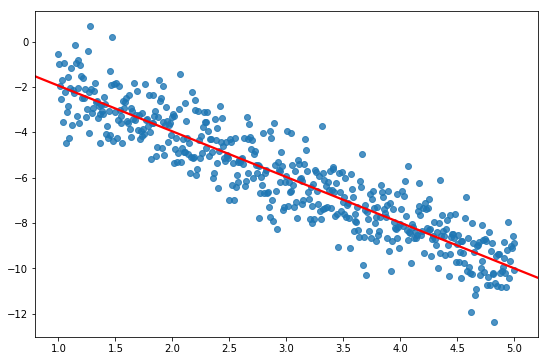

In [13]:
x = np.linspace(1, 5, 500)
y = -2 * x + np.random.normal(scale=1, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [14]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[ 1.        -0.9171822]
 [-0.9171822  1.       ]]


Our correlation matrix

[[ 1.        -0.9171822]
 [-0.9171822  1.       ]]


### Correlation for a 4 feature matrix

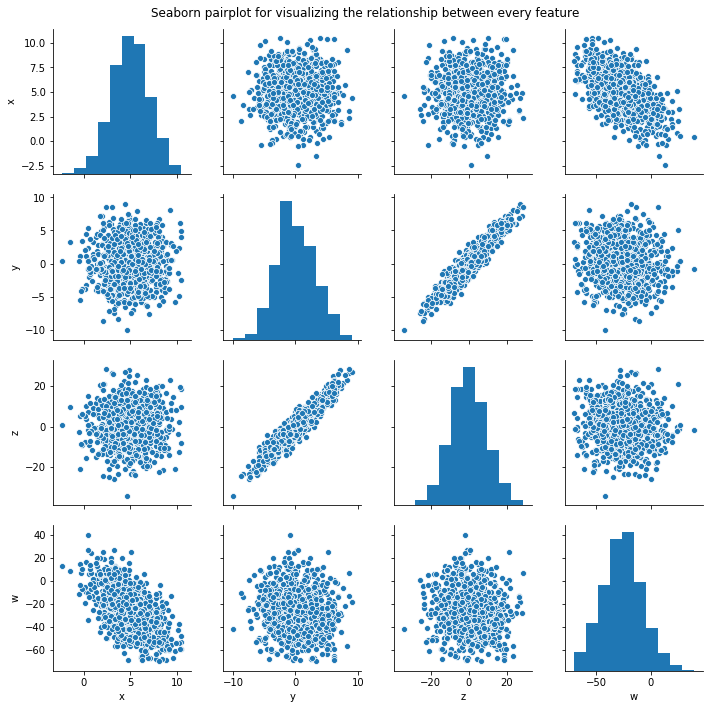

In [61]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)
z = 3 * y + np.random.normal(scale=3, size=1000)
w = -5 * x + np.random.normal(scale=15, size=1000)

X = np.vstack((x, y, z, w)).T
df_X = pd.DataFrame(X, columns=['x', 'y', 'z', 'w'])

sns.pairplot(df_X)
plt.suptitle('Seaborn pairplot for visualizing the relationship between every feature')
plt.subplots_adjust(top=0.95)

In [62]:
print('Correlation matrix from numpy\n')
print(np.corrcoef(X, rowvar=False))
print('\n=================================\n')
print('Our correlation matrix\n')
print(correlation(X))

Correlation matrix from numpy

[[ 1.          0.00965168  0.02139433 -0.55420947]
 [ 0.00965168  1.          0.94613913 -0.08317352]
 [ 0.02139433  0.94613913  1.         -0.08198748]
 [-0.55420947 -0.08317352 -0.08198748  1.        ]]


Our correlation matrix

[[ 1.          0.00965168  0.02139433 -0.55420947]
 [ 0.00965168  1.          0.94613913 -0.08317352]
 [ 0.02139433  0.94613913  1.         -0.08198748]
 [-0.55420947 -0.08317352 -0.08198748  1.        ]]


## Visualizing the correlation matrix


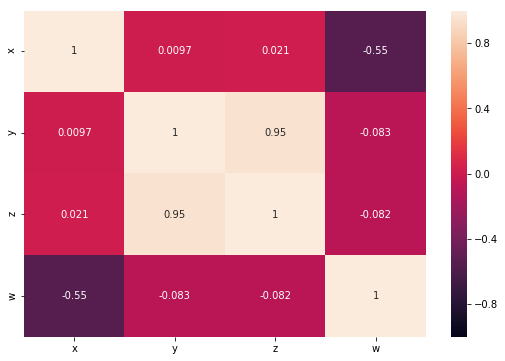

In [63]:
sns.heatmap(df_X.corr(), linewidths=0, vmin=-1, vmax=1, annot=True);